In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

warnings.filterwarnings('ignore')

In [ ]:
# Load the dataset
raw_df = pd.read_excel('/content/drive/MyDrive/Data/raw_data.xlsx')

In [ ]:
raw_df

,iso_code,location,date,Week number,Year,Unique,total_cases,new_cases,total_vaccinations,people_vaccinated,people_fully_vaccinated,stringency_index,population_density,aged_65_older,aged_70_older,human_development_index,population,Average Mortality Rate
0,AUS,Australia,2020-01-03,1,2020,AUS12020,NaN,0.0,NaN,NaN,NaN,0.0,3.202,15.504,10.129,0.944,26177410,0.059465
1,AUS,Australia,2020-01-04,1,2020,AUS12020,NaN,0.0,NaN,NaN,NaN,0.0,3.202,15.504,10.129,0.944,26177410,0.059465
2,AUS,Australia,2020-01-05,2,2020,AUS22020,NaN,0.0,NaN,NaN,NaN,0.0,3.202,15.504,10.129,0.944,26177410,0.058977
3,AUS,Australia,2020-01-06,2,2020,AUS22020,NaN,0.0,NaN,NaN,NaN,0.0,3.202,15.504,10.129,0.944,26177410,0.058977
4,AUS,Australia,2020-01-07,2,2020,AUS22020,NaN,0.0,NaN,NaN,NaN,0.0,3.202,15.504,10.129,0.944,26177410,0.058977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40059,USA,United States,2023-06-03,22,2023,USA222023,103436829.0,0.0,NaN,NaN,NaN,NaN,35.608,15.413,9.732,0.926,338289856,0.090357
40060,USA,United States,2023-06-04,23,2023,USA232023,103436829.0,0.0,NaN,NaN,NaN,NaN,35.608,15.413,9.732,0.926,338289856,0.091093
40061,USA,United States,2023-06-05,23,2023,USA232023,103436829.0,0.0,NaN,NaN,NaN,NaN,35.608,15.413,9.732,0.926,338289856,0.091093
40062,USA,United States,2023-06-06,23,2023,USA232023,103436829.0,0.0,NaN,NaN,NaN,NaN,35.608,15.413,9.732,0.926,338289856,0.091093


In [ ]:
raw_df.fillna(0,inplace = True)

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40064 entries, 0 to 40063
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   iso_code                 40064 non-null  object        
 1   location                 40064 non-null  object        
 2   date                     40064 non-null  datetime64[ns]
 3   Week number              40064 non-null  int64         
 4   Year                     40064 non-null  int64         
 5   Unique                   40064 non-null  object        
 6   total_cases              40064 non-null  float64       
 7   new_cases                40064 non-null  float64       
 8   total_vaccinations       40064 non-null  float64       
 9   people_vaccinated        40064 non-null  float64       
 10  people_fully_vaccinated  40064 non-null  float64       
 11  stringency_index         40064 non-null  float64       
 12  population_density       40064 n

In [ ]:
raw_df = raw_df.astype({'new_cases' : 'int', 'total_cases' : 'int', 'total_vaccinations' : 'int', 'people_fully_vaccinated' : 'int', 'Average Mortality Rate' : 'float'})

In [ ]:
mortality_rate = raw_df.groupby('iso_code').mean()['Average Mortality Rate'].reset_index()
mortality_rate['Average Mortality Rate'] = round(mortality_rate['Average Mortality Rate']*100, 2)
mortality_rate.head()

,iso_code,Average Mortality Rate
0,AUS,6.78
1,AUT,10.15
2,BEL,10.19
3,BGR,18.50
4,CAN,8.33


In [ ]:
mortality_rate_23 = raw_df[raw_df['Year']==2023].groupby('iso_code').mean()['Average Mortality Rate'].reset_index()
mortality_rate_23['Average Mortality Rate'] = round(mortality_rate_23['Average Mortality Rate']*100, 2)
mortality_rate_23.head()

,iso_code,Average Mortality Rate
0,AUS,6.90
1,AUT,10.22
2,BEL,9.98
3,BGR,15.42
4,CAN,8.81


In [ ]:
vaccinations = raw_df.groupby('iso_code').agg({'people_fully_vaccinated' : 'max', 'population' : 'max'}).reset_index()
vaccinations['vaccinated_percentage'] = vaccinations['people_fully_vaccinated']/vaccinations['population']
vaccinations['vaccinated_percentage'] = round(vaccinations['vaccinated_percentage']*100)
vaccinations.head()

,iso_code,people_fully_vaccinated,population,vaccinated_percentage
0,AUS,21648824,26177410,83.0
1,AUT,6683091,8939617,75.0
2,BEL,9168920,11655923,79.0
3,BGR,2077682,6781955,31.0
4,CAN,31762130,38454328,83.0


In [ ]:
lockdown_stringency = raw_df.groupby('iso_code').agg({'stringency_index' : 'sum'}).reset_index()
lockdown_stringency.head()

,iso_code,stringency_index
0,AUS,51727.94
1,AUT,53860.86
2,BEL,42795.83
3,BGR,39639.66
4,CAN,55141.10


In [ ]:
covid = raw_df[raw_df['Year']==2023].groupby('iso_code').agg({'new_cases' : 'sum'}).reset_index()
covid.head()

,iso_code,new_cases
0,AUS,634480
1,AUT,377222
2,BEL,114858
3,BGR,15893
4,CAN,188633


In [ ]:
long_covid = raw_df[raw_df['Year'].isin([2020,2021,2022])].groupby('iso_code').agg({'total_cases' : 'max'}).reset_index()
long_covid.head()

,iso_code,total_cases
0,AUS,10785559
1,AUT,5700848
2,BEL,4684904
3,BGR,1292033
4,CAN,4492624


In [ ]:
def linear_regression(X, y, labels=None, plt_title=None, x_label=None):
    """
    Perform linear regression and visualize the results.

    Parameters:
        X (numpy array or pandas Series): Feature variable.
        y (numpy array or pandas Series): Target variable.
        labels (numpy array or pandas Series, optional): Labels for data points (countries).

    Returns:
        model (statsmodels.regression.linear_model.RegressionResultsWrapper): The fitted linear regression model.
        y_pred (numpy array): Predicted target variable values.
        r2 (float): R-squared value indicating the goodness of fit.
        p_value (float): P-value for the coefficient of the linear regression model.
    """
    X = X.values.reshape(-1, 1) if isinstance(X, pd.Series) else X.reshape(-1, 1)
    y = y.values if isinstance(y, pd.Series) else y

    # Perform linear regression using statsmodels
    X_with_intercept = sm.add_constant(X)
    model = sm.OLS(y, X_with_intercept).fit()
    y_pred = model.predict(X_with_intercept)
    p_value = model.pvalues[1]


    # Calculate R-squared value
    r2 = r2_score(y, y_pred)

    # Plot the data and regression line
    plt.scatter(X, y)

    if labels is not None:
        labels = labels.values if isinstance(labels, pd.Series) else labels
        for i, label in enumerate(labels):
            plt.annotate(label, (X[i], y[i]), textcoords="offset points", xytext=(0, 5), ha='center')

    plt.plot(X, y_pred, color='red')
    plt.xlabel(x_label)
    plt.ylabel('Mortality Rate %')
    plt.title(plt_title)
    # plt.text(max(X), max(y_pred), f'R² = {r2:.2f}', ha='right', va='top')

    # Display the plot
    plt.show()

    return model, y_pred, r2, p_value


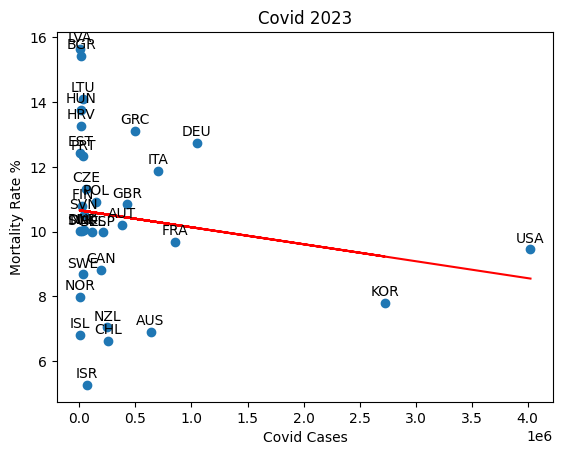

P-value: 0.350769670576221
R-squared Value: 0.029077665821472864


In [ ]:
X = covid['new_cases']
# y = mortality_rate['Average Mortality Rate']
y = mortality_rate_23['Average Mortality Rate']
labels = vaccinations['iso_code']
title = 'Covid 2023'
x_label = 'Covid Cases'

model, y_pred, r2, p = linear_regression(X, y, labels=labels, plt_title=title, x_label=x_label)

print("P-value:", p)
print("R-squared Value:", r2)

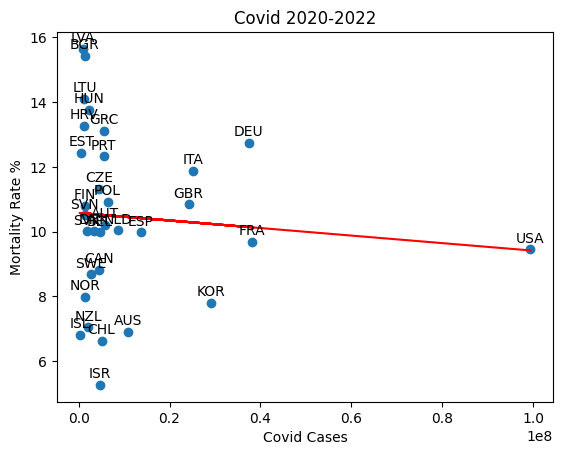

P-value: 0.6365786536485987
R-squared Value: 0.007537896936687383


In [ ]:
X = long_covid['total_cases']
# y = mortality_rate['Average Mortality Rate']
y = mortality_rate_23['Average Mortality Rate']
labels = vaccinations['iso_code']
title = 'Covid 2020-2022'
x_label = 'Covid Cases'

model, y_pred, r2, p = linear_regression(X, y, labels=labels, plt_title=title, x_label=x_label)

print("P-value:", p)
print("R-squared Value:", r2)

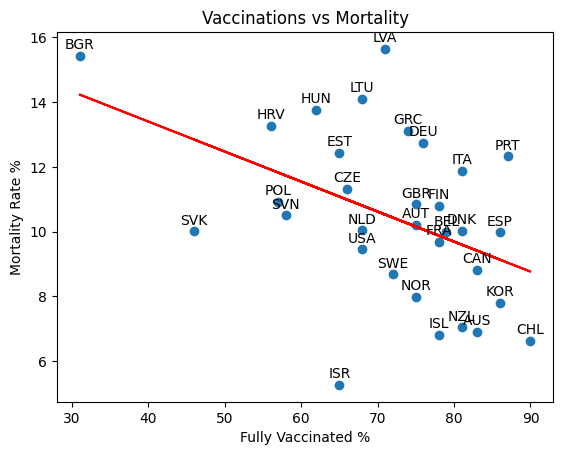

P-value: 0.009290220527672538
R-squared Value: 0.20487386758136727


In [ ]:
X = vaccinations['vaccinated_percentage']
# y = mortality_rate['Average Mortality Rate']
y = mortality_rate_23['Average Mortality Rate']
labels = vaccinations['iso_code']
title = 'Vaccinations vs Mortality'
x_label = 'Fully Vaccinated %'

model, y_pred, r2, p = linear_regression(X, y, labels=labels, plt_title=title, x_label=x_label)

print("P-value:", p)
print("R-squared Value:", r2)

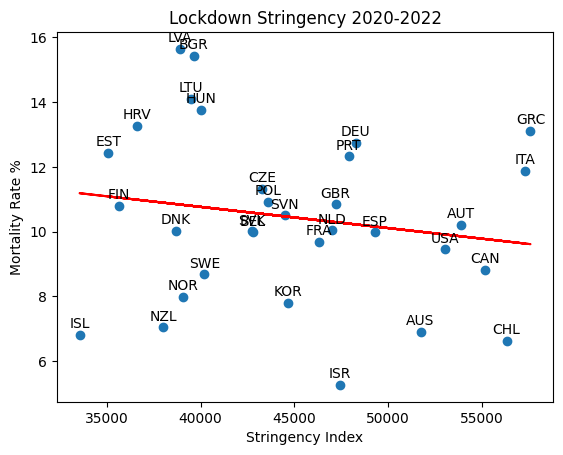

P-value: 0.34290929026509676
R-squared Value: 0.030026630177052982


In [ ]:
X = lockdown_stringency['stringency_index']
# y = mortality_rate['Average Mortality Rate']
y = mortality_rate_23['Average Mortality Rate']
labels = vaccinations['iso_code']
title = 'Lockdown Stringency 2020-2022'
x_label = 'Stringency Index'

model, y_pred, r2, p = linear_regression(X, y, labels=labels, plt_title=title, x_label=x_label)

print("P-value:", p)
print("R-squared Value:", r2)

In [ ]:
# Covid Temporal Analysis